<a href="https://colab.research.google.com/github/vaibhavlokunde/AI-ML/blob/main/Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_blobs

 **SYNTAX**

X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1.0, center_box=(-10.0, 10.0), shuffle=True, random_state=None)

n_samples: int or list (default=100)

Total number of data points to generate or a list indicating the number of samples for each center.
Example: n_samples=100 generates 100 samples; n_samples=[50, 30, 20] generates 50, 30, and 20 samples for each cluster.
n_features: int (default=2)

Number of features (dimensions) for each sample.
centers: int, array-like, or None (default=3)

Number of cluster centers to generate.
If an array is provided, it should specify the coordinates of the centers.
cluster_std: float or array-like (default=1.0)

Standard deviation of the clusters.
Can be a single float (same for all clusters) or an array specifying the standard deviation for each cluster.
center_box: tuple of float (default=(-10.0, 10.0))

The bounding box for the cluster centers in the form (min, max).
shuffle: bool (default=True)

Whether to shuffle the samples.
random_state: int, RandomState instance, or None (default=None)

Seed for reproducibility. Set it to an integer to ensure the same dataset is generated each time.

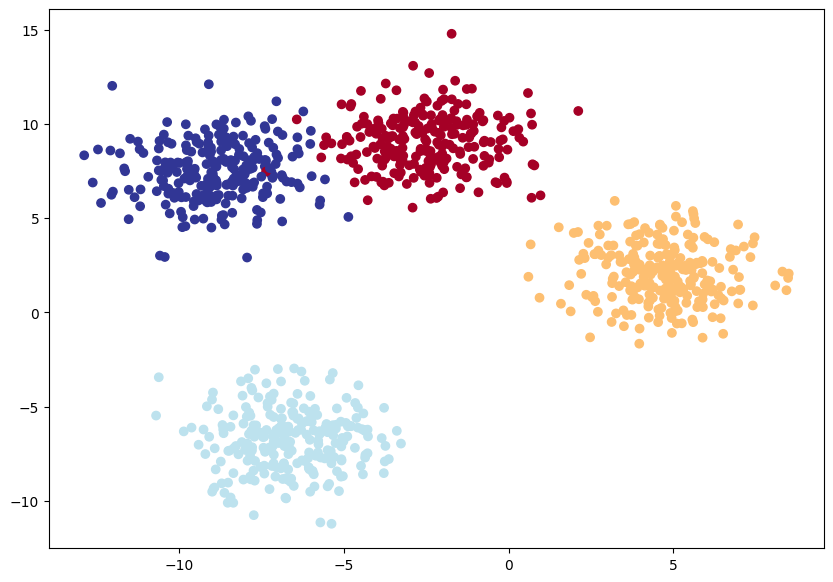

In [2]:
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

X_blob,y_blob=make_blobs(n_samples=1000,
                         n_features=NUM_FEATURES,
                         centers=NUM_CLASSES,
                         cluster_std=1.5,
                         random_state=RANDOM_SEED)


#Turn data into tensors
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)


X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,
                                                                  y_blob,
                                                                  test_size=0.2,
                                                                  random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)



#Building a Multi CLass Model

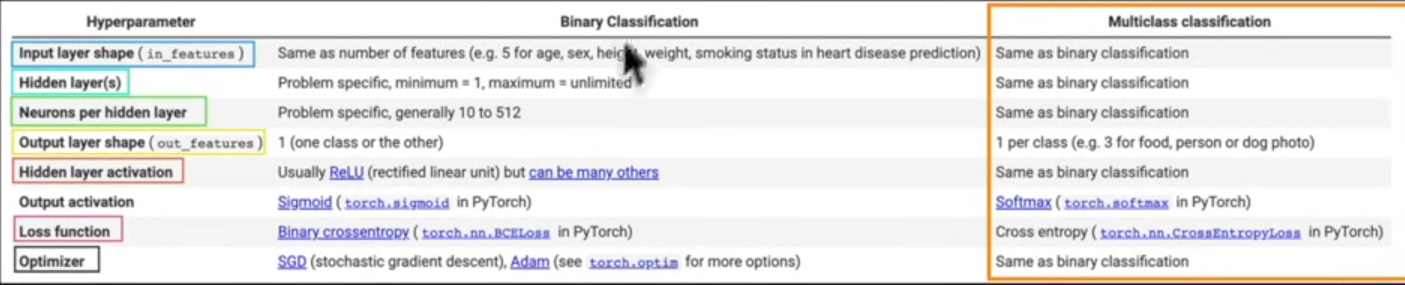

In [3]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

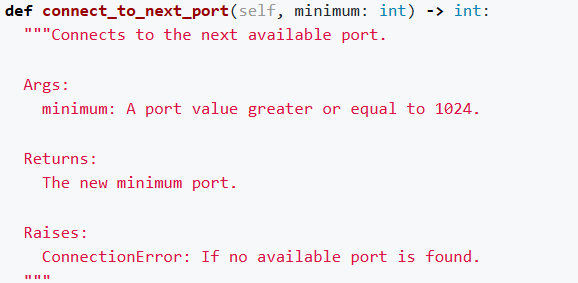

These r few things u need to know about function passing in python

In [4]:
from torch import nn
#The below is a new method to make a model

class BlobModel(nn.Module):
  #When usually the models r big and there r many parameters involved its better to pass those parameters like this
  def __init__(self,input_features,output_features,hidden_units=8):
    """Initializes multi-class model

    Args:
      input_features=number of input feature in the model
      output_features=number of output classes
      hidden units=Number of hidden units between layers,default 8
    """
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )


  def forward(self,x):
    return self.linear_layer_stack(x)

model_4=BlobModel(input_features=2,
                  output_features=4,
                  hidden_units=8).to(device)

model_4





BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [5]:
model_4.state_dict()

OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.1941, -0.5977],
                      [ 0.6626, -0.3427],
                      [ 0.4954, -0.7056],
                      [ 0.5169,  0.3272],
                      [ 0.3703, -0.2233],
                      [-0.5429,  0.4851],
                      [ 0.1653, -0.5855],
                      [-0.4717,  0.2323]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.3688, -0.0312,  0.2051,  0.5498, -0.6665,  0.2390, -0.5388, -0.1309])),
             ('linear_layer_stack.2.weight',
              tensor([[-0.2389, -0.1727, -0.3106,  0.2165, -0.1262,  0.3265, -0.3380,  0.1733],
                      [-0.2255, -0.2077, -0.2037, -0.2251,  0.0543,  0.0349,  0.0530, -0.2839],
                      [ 0.0249,  0.1229,  0.2592,  0.0128, -0.3139, -0.2506, -0.3277,  0.0644],
                      [-0.0157,  0.1147, -0.3185,  0.2062,  0.0663, -0.0899,  0.2677, -0.2091],
                      [-0.1114,  0.3082, -0.220

**CROSS ENTROPY LOSS**

nn.CrossEntropyLoss is a loss function in PyTorch used for multi-class classification problems. It combines two operations:

LogSoftmax: It applies a softmax function to the model's output to obtain probabilities for each class, and then takes the logarithm of these probabilities.
Negative Log Likelihood Loss (NLLLoss): It calculates the negative log likelihood of the correct class given the predicted probabilities.
In simpler terms:

The model predicts a score for each class.
Softmax converts these scores into probabilities.
LogSoftmax takes the logarithm of these probabilities.
NLLLoss measures the difference between the predicted probabilities and the actual target class.
CrossEntropyLoss is the combination of these steps, calculating a single loss value that reflects how well the model is performing.
Multi-Class Classification
In multi-class classification, the goal is to assign an input to one of several possible classes. nn.CrossEntropyLoss is particularly well-suited for this task because:

Probability Distribution: It encourages the model to output a probability distribution over the classes, which is crucial for multi-class problems.
Efficient Computation: It combines the softmax and NLLLoss calculations into a single step, making it computationally efficient.
Well-Established: It's a widely used and well-established loss function for multi-class classification.
How it helps:

By minimizing the CrossEntropyLoss, the model learns to assign higher probabilities to the correct class and lower probabilities to incorrect classes.
This leads to improved classification accuracy and better overall model performance.

In [6]:
#Loss function

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(model_4.parameters(),lr=0.1)

In [7]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=correct/len(y_pred)
  return acc

In [8]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_train.to(device))
y_logits[:10]

#These are logits....now we have to convert these logits into out predictions

tensor([[-0.3703, -0.0879, -0.4612,  0.0453],
        [-1.1277, -0.0316, -1.1214, -0.3719],
        [-0.4666,  0.3497,  0.0433, -0.0318],
        [-0.5811,  0.1279, -0.0928,  0.0244],
        [-1.1074,  0.0179, -0.9347, -0.3107],
        [-0.6440, -0.2591, -1.0473, -0.2093],
        [-1.3528,  0.1131, -1.1121, -0.4534],
        [-0.3692, -0.1556, -0.4785,  0.0683],
        [-1.4643,  0.2924, -0.8305, -0.4805],
        [-1.2180,  0.0591, -1.0197, -0.3765]])

Logits -> Pred prob -> Pred labels

In [9]:
#We will use torch.softmax

y_pred_probs=torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.3703, -0.0879, -0.4612,  0.0453],
        [-1.1277, -0.0316, -1.1214, -0.3719],
        [-0.4666,  0.3497,  0.0433, -0.0318],
        [-0.5811,  0.1279, -0.0928,  0.0244],
        [-1.1074,  0.0179, -0.9347, -0.3107]])
tensor([[0.2103, 0.2790, 0.1921, 0.3187],
        [0.1403, 0.4198, 0.1412, 0.2987],
        [0.1545, 0.3495, 0.2573, 0.2387],
        [0.1540, 0.3129, 0.2509, 0.2821],
        [0.1335, 0.4115, 0.1587, 0.2962]])


In [10]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [11]:
torch.sum(y_pred_probs[0]) #The all sum upto 1 in each layer For eg: [0.1176, 0.4855, 0.1399, 0.2569]

tensor(1.)

In [12]:
torch.max(y_pred_probs[0]) #This will return the max value

tensor(0.3187)

In [13]:
torch.argmax(y_pred_probs[0]) #This will return the index of the max value

tensor(3)

In [14]:
#Convert our models prediction probabilities to prediction labels

y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 3,
        1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1,
        3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1,
        1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 3,
        1, 3, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3,
        1, 1, 3, 1, 1, 3, 3, 1, 3, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1,
        1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1,
        3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3,
        1, 1, 1, 1, 3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 1,
        1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
        3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,

Logits(raw output of the model) -> Pred Probs(use torch.softmax) -> Pred Labels(take the argmax of the prediction probabilities).

In [15]:
#Training Loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):

  model_4.train()

  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)


  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_blob_train,y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing Loop

  model_4.eval

  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_blob_test,y_pred)

  if epoch%10==0:
    print(f"Epoch:{epoch} | Loss:{loss:.4f},Acc:{acc:.2f},Test Loss:{test_loss:.4f},Test acc:{test_acc:.2f}")

RuntimeError: The size of tensor a (200) must match the size of tensor b (800) at non-singleton dimension 0

Thus to fix this error we change the datatype to LongTensor


In [16]:
#Training Loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):

  model_4.train()

  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)


  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_blob_train,y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  #Testing Loop

  model_4.eval

  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_blob_test,test_preds)

  if epoch%10==0:
    print(f"Epoch:{epoch} | Loss:{loss:.4f},Acc:{acc:.2f},Test Loss:{test_loss:.4f},Test acc:{test_acc:.2f}%")

Epoch:0 | Loss:1.2442,Acc:0.24,Test Loss:1.1101,Test acc:0.34%
Epoch:10 | Loss:0.4283,Acc:0.97,Test Loss:0.3684,Test acc:0.98%
Epoch:20 | Loss:0.1519,Acc:0.99,Test Loss:0.1345,Test acc:0.99%
Epoch:30 | Loss:0.0866,Acc:0.99,Test Loss:0.0759,Test acc:0.99%
Epoch:40 | Loss:0.0630,Acc:0.99,Test Loss:0.0539,Test acc:0.99%
Epoch:50 | Loss:0.0515,Acc:0.99,Test Loss:0.0428,Test acc:0.99%
Epoch:60 | Loss:0.0448,Acc:0.99,Test Loss:0.0362,Test acc:0.99%
Epoch:70 | Loss:0.0404,Acc:0.99,Test Loss:0.0319,Test acc:0.99%
Epoch:80 | Loss:0.0374,Acc:0.99,Test Loss:0.0288,Test acc:0.99%
Epoch:90 | Loss:0.0351,Acc:0.99,Test Loss:0.0265,Test acc:0.99%


In [17]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test)

y_logits[:10]

tensor([[ 1.5771,  7.3471, -2.5224, -5.1476],
        [-1.1975, -7.6010, -2.8371,  4.0773],
        [-6.4276,  0.1246,  8.3096,  0.6703],
        [ 0.3809,  5.6198, -0.7777, -3.6538],
        [ 5.1899,  1.1117, -7.2305, -3.3427],
        [-1.5142, -8.9202, -3.1619,  4.8788],
        [-5.5692,  0.3661,  7.5488,  0.1954],
        [ 4.7676, -1.2873, -6.8752, -1.8312],
        [-8.0641, -0.0695, 10.0144,  1.2939],
        [ 4.8390, -0.3071, -6.8745, -2.3972]])

In [18]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[3.1101e-03, 9.9683e-01, 5.1565e-05, 3.7346e-06],
        [5.0879e-03, 8.4245e-06, 9.8734e-04, 9.9392e-01],
        [3.9753e-07, 2.7861e-04, 9.9924e-01, 4.8080e-04],
        [5.2689e-03, 9.9298e-01, 1.6541e-03, 9.3217e-05],
        [9.8315e-01, 1.6652e-02, 3.9675e-06, 1.9363e-04],
        [1.6699e-03, 1.0147e-06, 3.2144e-04, 9.9801e-01],
        [2.0059e-06, 7.5857e-04, 9.9860e-01, 6.3954e-04],
        [9.9630e-01, 2.3376e-03, 8.7494e-06, 1.3569e-03],
        [1.4077e-08, 4.1739e-05, 9.9980e-01, 1.6317e-04],
        [9.9349e-01, 5.7842e-03, 8.1290e-06, 7.1537e-04]])

In [19]:
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [20]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download")
else:
  print("Downloading helper functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

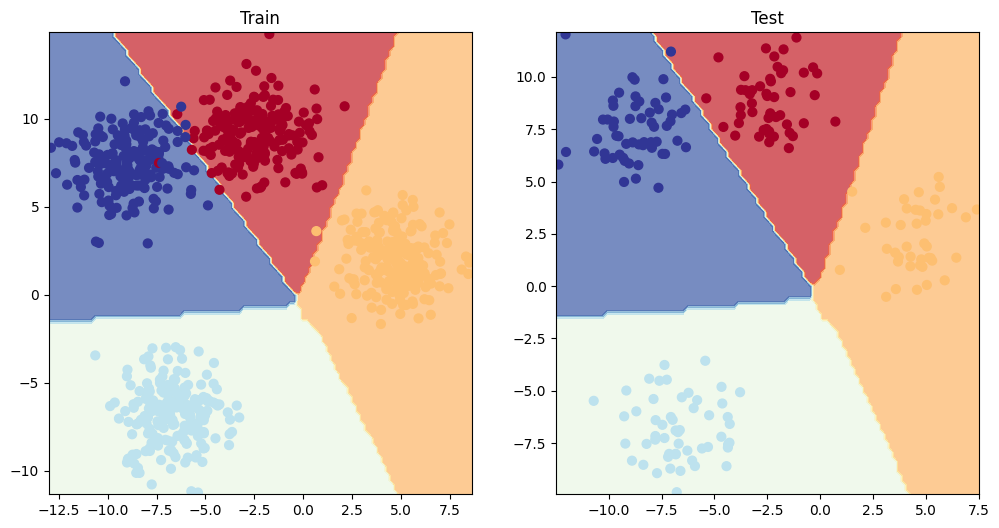

In [21]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

YOU need to know that even if u take out ReLU() function....itll still give the same results.

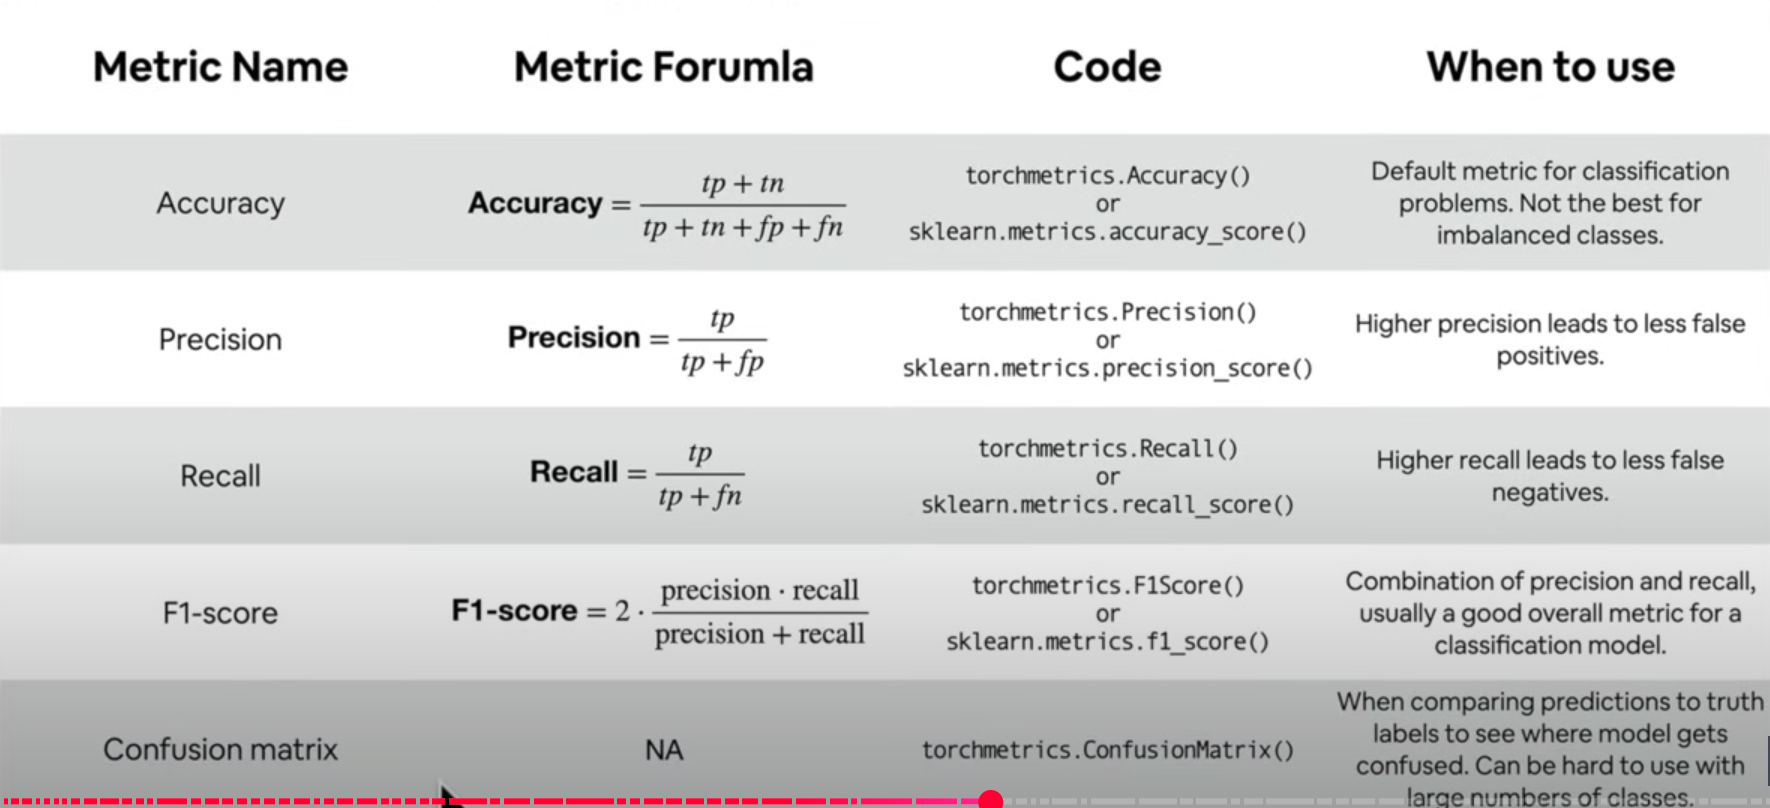

In [22]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 43.3 MB/s eta 0:00:00


In [25]:
from torchmetrics import Accuracy

# Setup metric
# Here num_classes are the number of classes, ie 0-3
torchmetric_accuracy=Accuracy(task="multiclass",num_classes=4)


#Calculate accuracy
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9950)